(공통) 7차시_프로젝트 3 제출코드.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1xL-4beRUXTN28Bexxs7vyg45rBdp6JtX

### [TODO] 코드 구현 : `missingno` 라이브러리로 결측치 데이터 시각화 하기

--2024-01-17 06:16:51--  http://xn--no-check-certificate-2t2l/
Resolving xn--no-check-certificate-2t2l (xn--no-check-certificate-2t2l)... failed: Name or service not known.
wget: unable to resolve host address ‘xn--no-check-certificate-2t2l’
--2024-01-17 06:16:51--  https://docs.google.com/uc?export=download&id=1IVvuG3SMlarSSGmcliGFjq1fMxZtksE0
Resolving docs.google.com (docs.google.com)... 142.251.162.102, 142.251.162.100, 142.251.162.113, ...
Connecting to docs.google.com (docs.google.com)|142.251.162.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1IVvuG3SMlarSSGmcliGFjq1fMxZtksE0&export=download [following]
--2024-01-17 06:16:51--  https://drive.usercontent.google.com/download?id=1IVvuG3SMlarSSGmcliGFjq1fMxZtksE0&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.13.132, 2607:f8b0:400c:c09::84
Connecting to drive.usercontent.google.com (drive.usercon

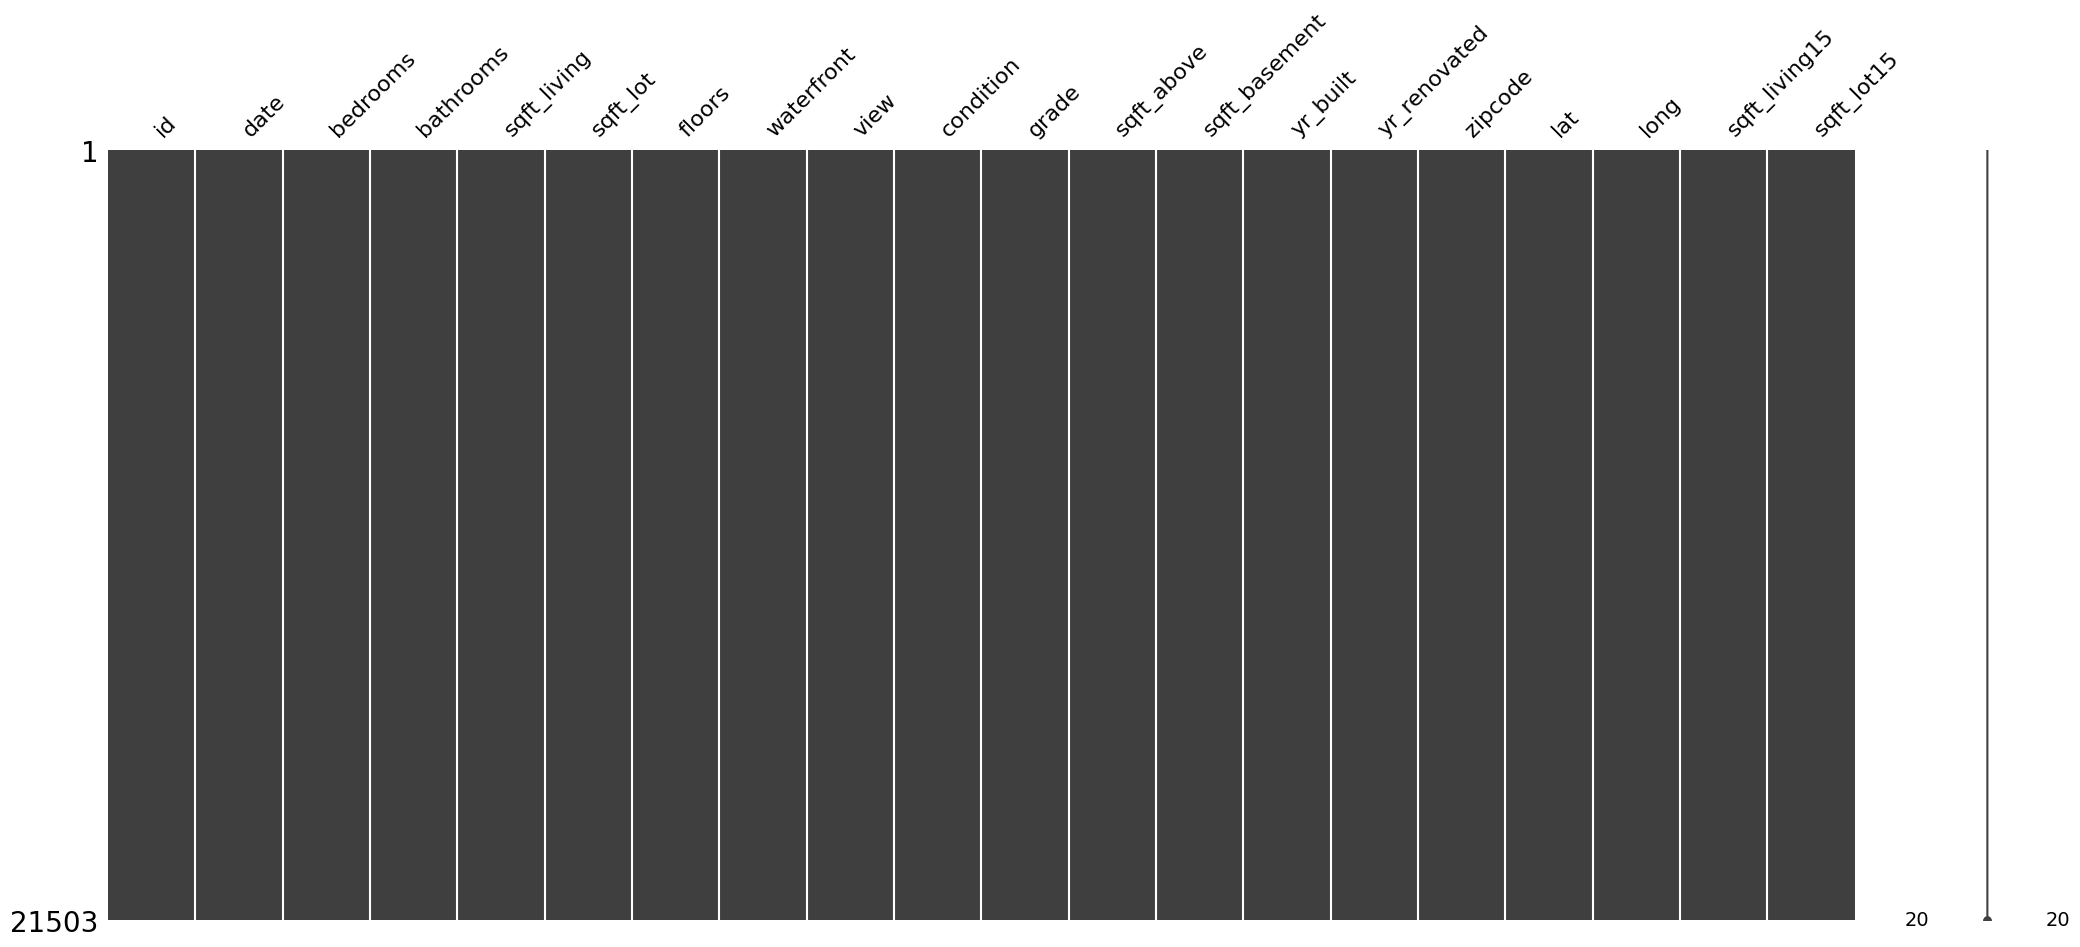

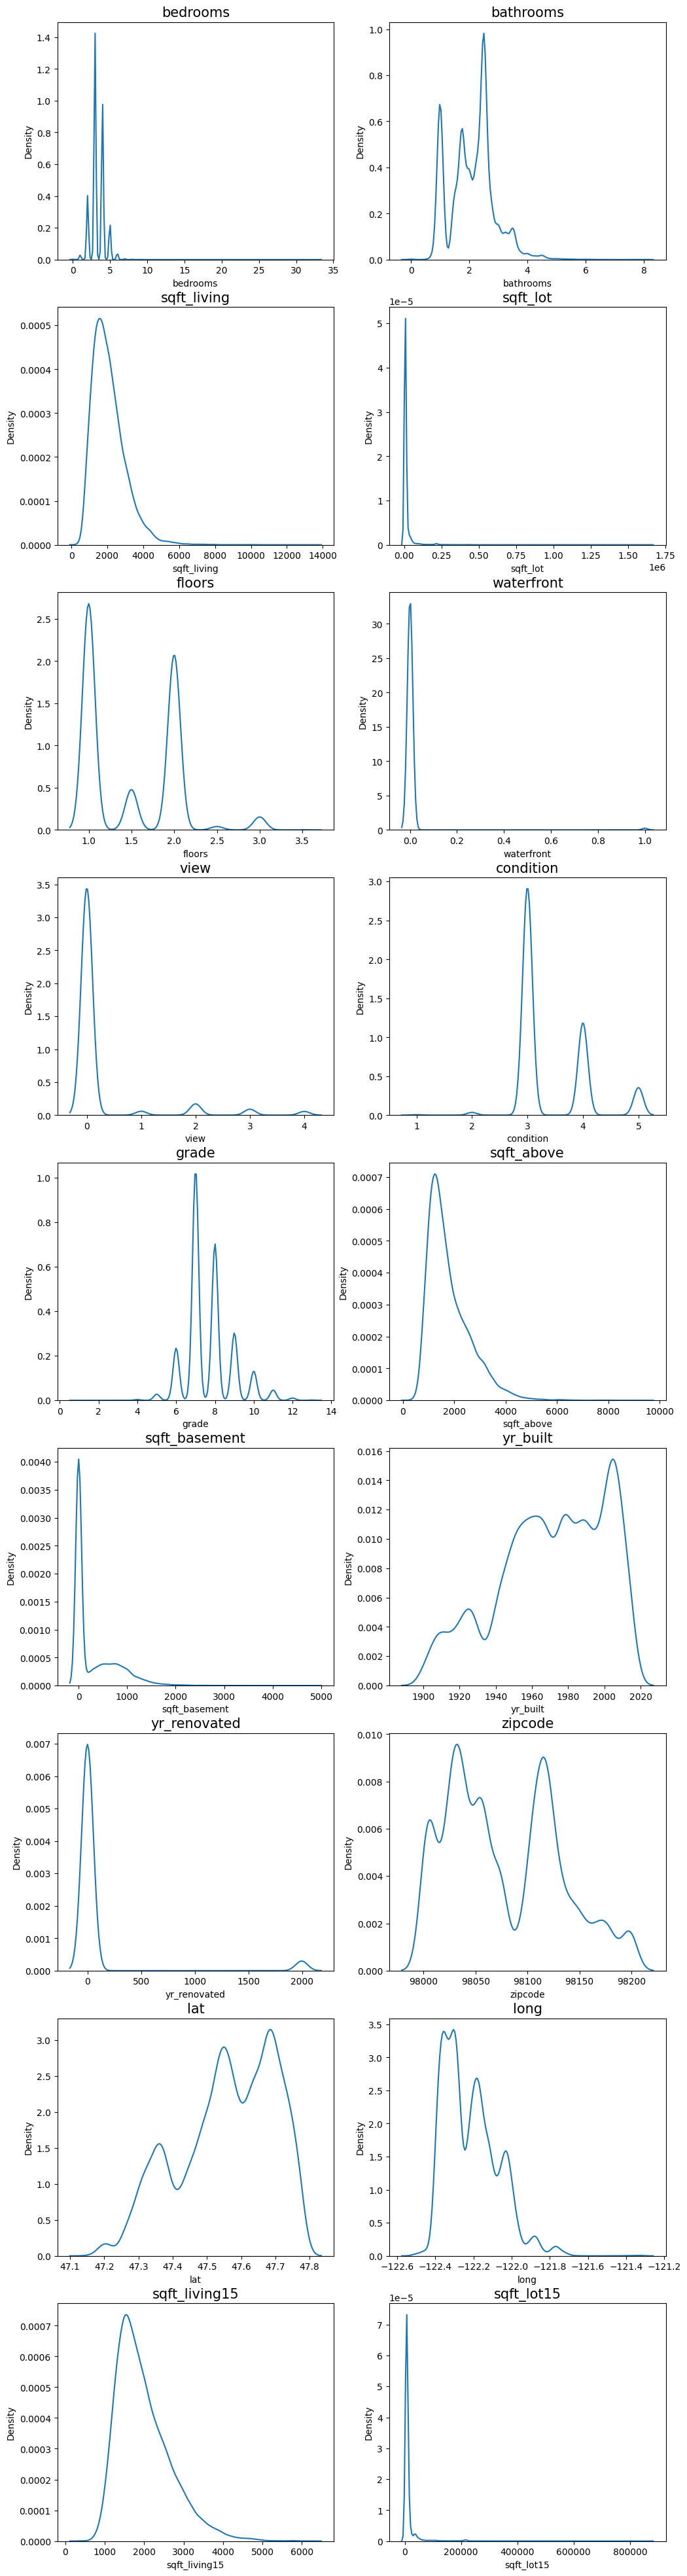

In [1]:
import missingno as msno # 라이브러리 임포트

## 코드시작 ##
# 미션 3-2 코드 작성 : data에 결손치를 missingno 라이브러리를 이용하여 시각화 해보세요.

import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 다운로드
!wget –no-check-certificate 'https://docs.google.com/uc?export=download&id=1IVvuG3SMlarSSGmcliGFjq1fMxZtksE0' -O kaggle-kakr-housing-data.zip

# 다운로드 받은 zip파일 압축풀기
!unzip -qq ./kaggle-kakr-housing-data.zip

train_data_path = './data/train.csv'
test_data_path = './data/test.csv'

data = pd.read_csv(train_data_path)
sub = pd.read_csv(test_data_path)
print('train data dim : {}'.format(data.shape))
print('sub data dim : {}'.format(sub.shape))

# data의 price를 y로 옮기기
y = data['price']

## 코드시작 ##
# 미션 2 코드 작성 : data에서 price 컬럼을 완전히 삭제하기

data = data.drop('price', axis=1)

## 코드종료 ##

print(data.columns)

train_len = len(data) # 학습데이터의 수
data = pd.concat((data, sub), axis=0) # 학습데이터와 테스트 데이터 합치기

print(len(data)) # 합쳐진 데이터의 수
data.head() # 데이터 확인

data.info()

missing = data.isna().sum()
print(missing)

missing/data.shape[0]

data.describe()

########################
### 미션 코드작성 3-2 #####
########################
msno.matrix(data)

## 코드종료 ##

sub_id = data['id'][train_len:]
del data['id']

print(data.columns)

data['date'] = data['date'].apply(lambda x : str(x[:6]))
data.head()

fig, ax = plt.subplots(9, 2, figsize=(12, 50))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요.

# date 변수(count==0인 경우)는 제외하고 분포를 확인
count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

### [TODO] 코드 구현 : 로그변환 수행

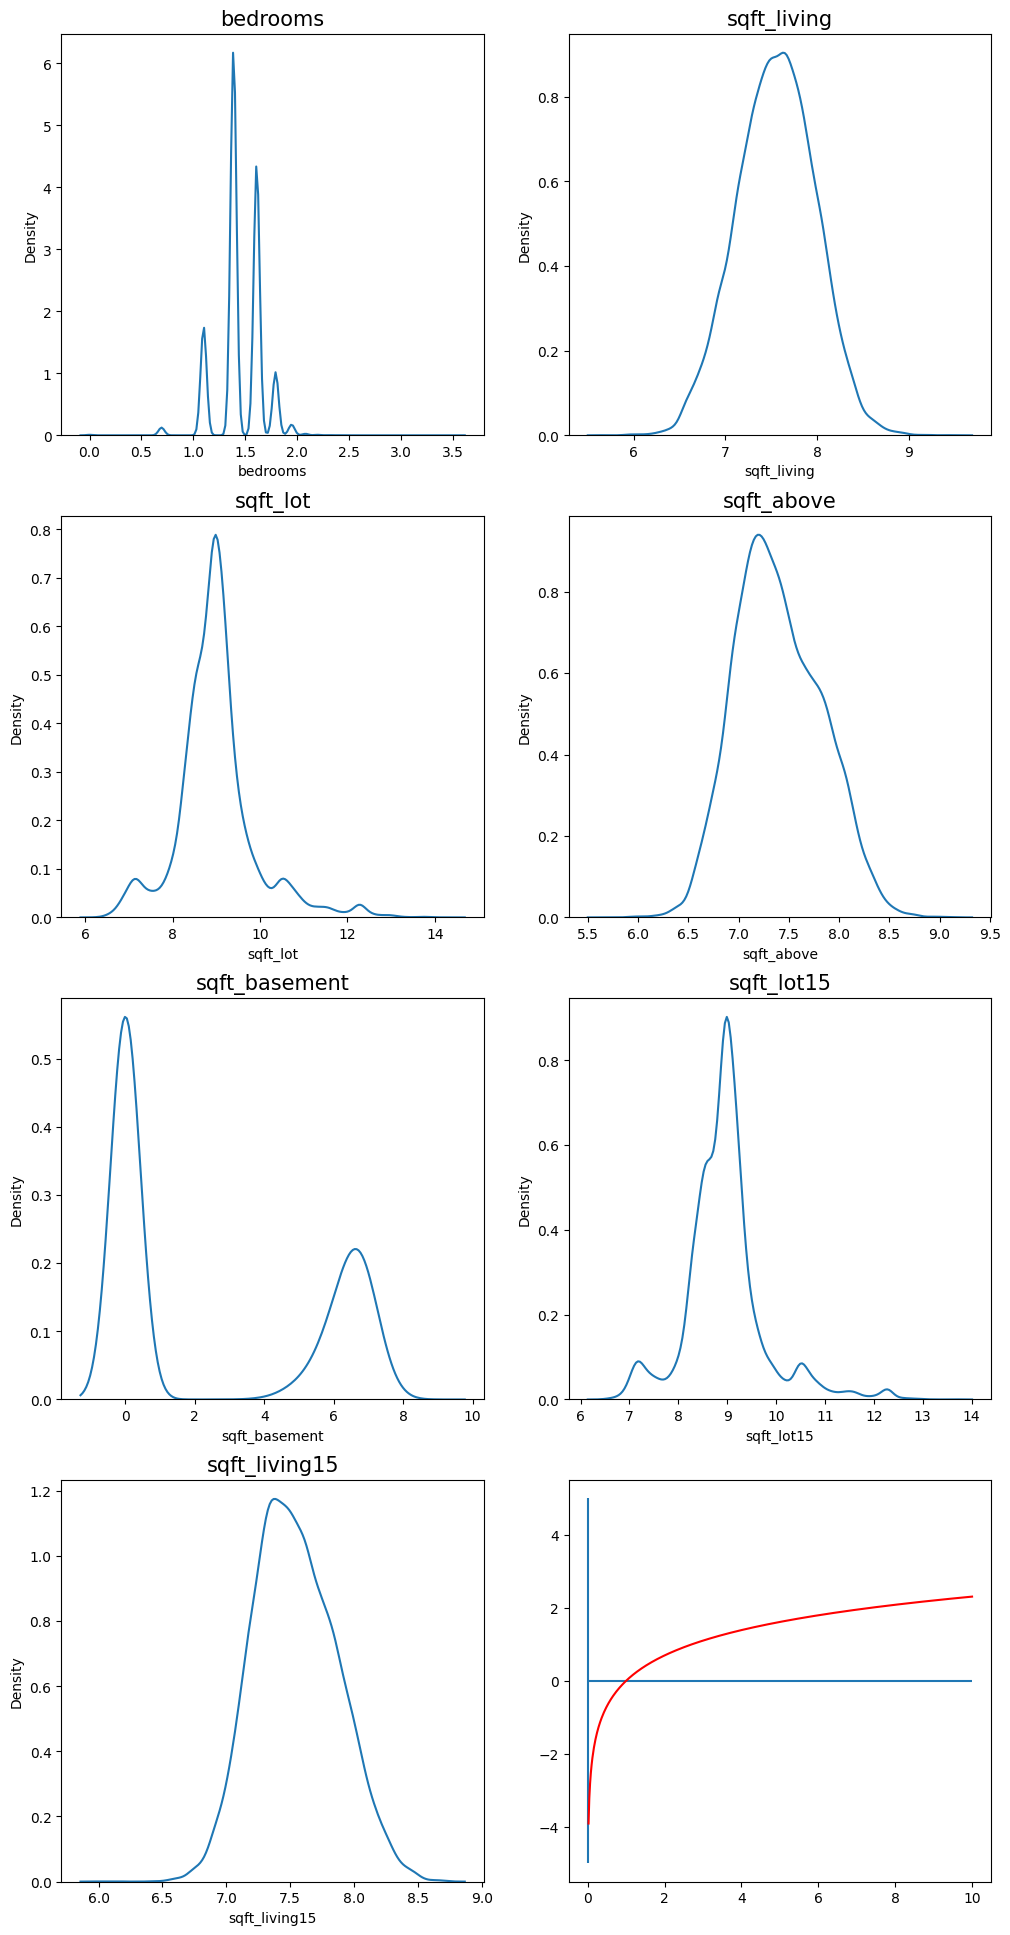

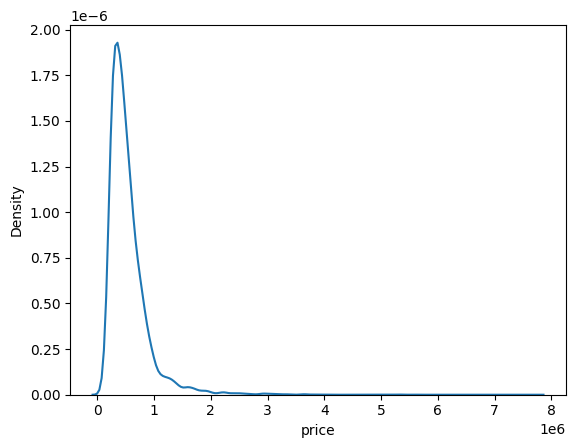

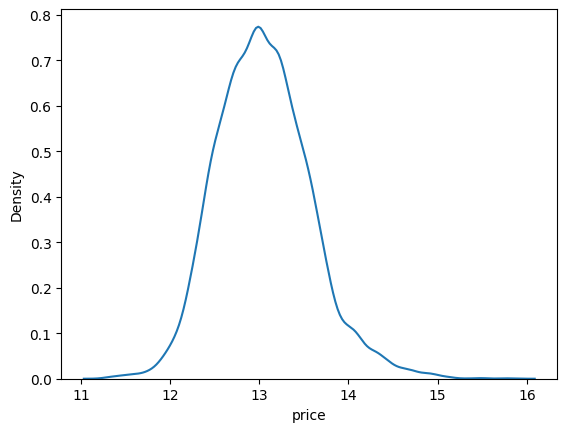

(15035, 19)
(6468, 19)


In [2]:
## 코드시작 ##
# 미션 4 코드 작성 : 로그변환을 수행해보세요.

# 치우친 분포의 컬럼을 저장해 두기
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = np.log1p(data[c])




## 코드종료 ##

fig, ax = plt.subplots(4, 2, figsize=(12, 24))

count = 0
for row in range(4):
    for col in range(2):
        if count == 7:
            break
        sns.kdeplot(data=data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1


xx = np.linspace(0, 10, 500)
yy = np.log(xx)

plt.hlines(0, 0, 10)
plt.vlines(0, -5, 5)
plt.plot(xx, yy, c='r')
plt.show()

sns.kdeplot(y) # y는 미션 2에서 price를 저장하고 있음.
plt.show()

y_log_transformation = np.log1p(y) # 미션4의 힌트가 되겠네요 ^^

sns.kdeplot(y_log_transformation)
plt.show()

sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]

print(x.shape)
print(sub.shape)